# Wish Summer Clothes Classification Project
The purpose is to predict the success of wish summer clothes based on the number of units sold in August 2020.
Each observation is a summer clothing unit.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os


path = os.path.join('summer_clothes.csv')

def load_clothes_data(clothes_data=path):
    return pd.read_csv(path)

dataset = load_clothes_data()

In [4]:
dataset.head(3)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.0,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.0,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08


In [126]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

# DATA CLEANING

## inspecting features and removing useless ones

In [127]:
# manipulation to dataset will be stored in data
data = dataset.copy()

In [128]:
dup=data.duplicated()
#dupes
sum(dup)

34

In [129]:
data = data.drop_duplicates()

In [130]:
len(data)

1539

In [131]:
data.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

## removing features that have only one possible value

In [132]:
# removing features with one single possible value
for feature in data.columns:
    if len(data[feature].unique()) == 1:
        print('going to remove {}'.format(feature))
        data = data.drop(feature, axis=1)

going to remove currency_buyer
going to remove theme
going to remove crawl_month


## inspecting features one by one to decide which ones to start removing

In [133]:
# # inspecting features one by one to start removing some of them
# for feature in data.columns:
#     a = input()
#     if a == 'stop':
#         break
#     print(feature,'has',len(data[feature].unique()), 'unique values')
#     print(list(data[feature].unique()[:10]))

In [134]:
to_remove = ['title', 'title_orig', 'merchant_profile_picture', 'merchant_name', 'merchant_id',
             'product_url', 'product_picture', 'product_id', 'merchant_title', 'merchant_info_subtitle']

data = data.drop(to_remove, axis=1)

In [135]:
print('{} features removed'.format(len(dataset.columns) - len(data.columns)))

13 features removed


In [136]:
data.info()
#data.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1539 non-null   float64
 1   retail_price                  1539 non-null   int64  
 2   units_sold                    1539 non-null   int64  
 3   uses_ad_boosts                1539 non-null   int64  
 4   rating                        1539 non-null   float64
 5   rating_count                  1539 non-null   int64  
 6   rating_five_count             1496 non-null   float64
 7   rating_four_count             1496 non-null   float64
 8   rating_three_count            1496 non-null   float64
 9   rating_two_count              1496 non-null   float64
 10  rating_one_count              1496 non-null   float64
 11  badges_count                  1539 non-null   int64  
 12  badge_local_product           1539 non-null   int64  
 13  bad

In [137]:
# separating categorical and numerical features

categorical = []
numerical = []

for f in data.columns:
    if data[f].dtype == 'object':
        categorical.append(f)
    else:
        numerical.append(f)    

In [138]:
print('numerical feature:\n{}'.format(numerical))
print()
print('categorical feature:\n{}'.format(categorical))

numerical feature:
['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price', 'shipping_is_express', 'countries_shipped_to', 'inventory_total', 'has_urgency_banner', 'merchant_rating_count', 'merchant_rating', 'merchant_has_profile_picture']

categorical feature:
['tags', 'product_color', 'product_variation_size_id', 'shipping_option_name', 'urgency_text', 'origin_country']


In [139]:
def inspect_feature(data, f):  # custom function to inspect single feature
    print('{} has {} unique categories'.format(f, len(data[f].unique())))
    print('{}'.format(data[f].unique()))

In [140]:
# f = input('enter feature: ')
# inspect_feature(data, f)

In [141]:
# data['units_sold'].value_counts()

In [142]:
round(data.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1539.0,1539.0,1539.0,1539.0,1539.0,1539.0,1496.0,1496.0,1496.0,1496.0,...,1539.0,1539.0,1539.0,1539.0,1539.0,1539.0,468.0,1539.0,1539.0,1539.0
mean,8.0,23.0,4422.0,0.0,4.0,907.0,451.0,183.0,137.0,65.0,...,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26772.0,4.0,0.0
std,4.0,30.0,9438.0,0.0,1.0,2002.0,989.0,404.0,314.0,153.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,79191.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,26.0,13.0,5.0,4.0,2.0,...,0.0,7.0,2.0,0.0,31.0,50.0,1.0,2052.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,161.0,84.0,33.0,26.0,12.0,...,0.0,50.0,2.0,0.0,40.0,50.0,1.0,8197.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,873.0,431.0,171.0,134.0,64.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


In [143]:
# %matplotlib inline
# data[numerical].hist(bins=50, figsize=(20,15));

### removing features with too much imbalance between categories
decision based on the previous histograms

In [144]:
data['shipping_is_express'].value_counts()

0    1535
1       4
Name: shipping_is_express, dtype: int64

In [145]:
data['inventory_total'].value_counts()

50    1529
2        2
1        1
9        1
24       1
30       1
36       1
37       1
38       1
40       1
Name: inventory_total, dtype: int64

In [146]:
to_remove = ['shipping_is_express', 'inventory_total']

In [147]:
data = data.drop(to_remove, axis=1)

In [148]:
numerical = [f for f in numerical if f not in to_remove]
numerical

['price',
 'retail_price',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'product_variation_inventory',
 'shipping_option_price',
 'countries_shipped_to',
 'has_urgency_banner',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_has_profile_picture']

In [149]:
# %matplotlib inline
# data[numerical].hist(bins=50, figsize=(20,15));

## setting label and seeking correlations

In [150]:
label = 'units_sold'
corr_matrix = data.corr()

## looking at moderate-to-strong correlations
only including in correlation matrix those features that have at least one 0.3+ correlation with another feature

In [151]:
feature_for_corr_matrix = []

for f in corr_matrix:
    if True in ((abs(x) >= 0.3 and abs(x) != 1) for x in corr_matrix[f].values):
        feature_for_corr_matrix.append(f)

# reduced_corr_matrix = data[feature_for_corr_matrix].corr()

# plt.figure(figsize=(20,10))
# sns.heatmap(reduced_corr_matrix, annot=True, cmap='Dark2_r', linewidths=2);

## closer look at correlations with label

In [152]:
# plt.figure(figsize=(8, 12))
# heatmap = sns.heatmap(corr_matrix[[label]].sort_values(by=label, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title(f'Correlations with {label}', fontdict={'fontsize':18}, pad=16);

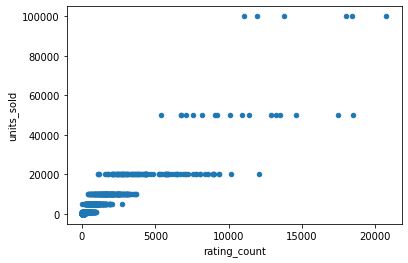

In [153]:
data.plot(kind="scatter", x="rating_count", y="units_sold");

## processing categorical features

In [154]:
for f in categorical:
    print(f)

tags
product_color
product_variation_size_id
shipping_option_name
urgency_text
origin_country


## <span style='color:blue'>product_color</span>

In [155]:
all_colors = data['product_color'].unique()
all_colors

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'navyblue',
       'blue', 'beige', 'grey', 'lightblue', 'orange', 'red', 'Black',
       'armygreen', nan, 'pink', 'khaki', 'red & blue', 'blue & pink',
       'RED', 'white & green', 'winered', 'black & green', 'purple',
       'whitefloral', 'floral', 'fluorescentgreen', 'orange & camouflage',
       'lightyellow', 'coolblack', 'multicolor', 'camouflage',
       'lightpink', 'pink & black', 'silver', 'Army green', 'lightgreen',
       'mintgreen', 'pink & grey', 'gray', 'coffee', 'rose',
       'light green', 'leopard', 'black & white', 'orange-red',
       'dustypink', 'White', 'star', 'white & black', 'apricot',
       'skyblue', 'burgundy', 'claret', 'pink & white', 'rosered', 'tan',
       'navy blue', 'wine red', 'lightred', 'Pink', 'coralred', 'brown',
       'lakeblue', 'darkblue', 'camel', 'pink & blue', 'nude', 'Blue',
       'lightpurple', 'army', 'black & stripe', 'Rose red',
       'greysnakeskinprint', 'denimbl

In [156]:
data['product_color'] = data['product_color'].str.lower()  # all colors written in lowercase

In [157]:
# getting values which contains an &
dual_color = [el for el in all_colors if str(el).__contains__('&')]
dual_color

['red & blue',
 'blue & pink',
 'white & green',
 'black & green',
 'orange & camouflage',
 'pink & black',
 'pink & grey',
 'black & white',
 'white & black',
 'pink & white',
 'pink & blue',
 'black & stripe',
 'gray & white',
 'brown & yellow',
 'winered & yellow',
 'navyblue & white',
 'white & red',
 'black & yellow',
 'black & blue']

In [158]:
# getting all single colors
single_color = [el for el in all_colors if el not in dual_color]
single_color

['white',
 'green',
 'leopardprint',
 'black',
 'yellow',
 'navyblue',
 'blue',
 'beige',
 'grey',
 'lightblue',
 'orange',
 'red',
 'Black',
 'armygreen',
 nan,
 'pink',
 'khaki',
 'RED',
 'winered',
 'purple',
 'whitefloral',
 'floral',
 'fluorescentgreen',
 'lightyellow',
 'coolblack',
 'multicolor',
 'camouflage',
 'lightpink',
 'silver',
 'Army green',
 'lightgreen',
 'mintgreen',
 'gray',
 'coffee',
 'rose',
 'light green',
 'leopard',
 'orange-red',
 'dustypink',
 'White',
 'star',
 'apricot',
 'skyblue',
 'burgundy',
 'claret',
 'rosered',
 'tan',
 'navy blue',
 'wine red',
 'lightred',
 'Pink',
 'coralred',
 'brown',
 'lakeblue',
 'darkblue',
 'camel',
 'nude',
 'Blue',
 'lightpurple',
 'army',
 'Rose red',
 'greysnakeskinprint',
 'denimblue',
 'applegreen',
 'offwhite',
 'lightgray',
 'navy',
 'army green',
 'whitestripe',
 'rainbow',
 'lightgrey',
 'watermelonred',
 'prussianblue',
 'wine',
 'ivory',
 'jasper',
 'lightkhaki',
 'offblack',
 'violet',
 'blackwhite',
 'darkgree

In [159]:
# # creating own table of colors iteratively and quickly

# colors_table = {}

# for color in single_color:
#     print(color)
#     new_color = input('associate to one color: ')
#     if new_color != '':
#         colors_table[color] = new_color
#     print()

# colors_table

In [160]:
reduced_colors = {'white': 'white',
 'green': 'green',
 'leopardprint': 'leopardprint',
 'black': 'black',
 'yellow': 'yellow',
 'navyblue': 'blue',
 'blue': 'blue',
 'beige': 'brown',
 'grey': 'grey',
 'lightblue': 'blue',
 'orange': 'orange',
 'red': 'red',
 'Black': 'black',
 'armygreen': 'green',
 'pink': 'pink',
 'khaki': 'green',
 'RED': 'red',
 'winered': 'red',
 'purple': 'purple',
 'whitefloral': 'white',
 'floral': 'floral',
 'fluorescentgreen': 'green',
 'lightyellow': 'yellow',
 'coolblack': 'black',
 'multicolor': 'multicolor',
 'camouflage': 'green',
 'lightpink': 'pink',
 'silver': 'grey',
 'Army green': 'green',
 'lightgreen': 'green',
 'mintgreen': 'green',
 'gray': 'grey',
 'coffee': 'brown',
 'rose': 'pink',
 'light green': 'green',
 'leopard': 'leopardprint',
 'orange-red': 'red',
 'dustypink': 'pink',
 'White': 'white',
 'star': 'yellow',
 'apricot': 'orange',
 'skyblue': 'blue',
 'burgundy': 'red',
 'claret': 'red',
 'rosered': 'red',
 'tan': 'brown',
 'navy blue': 'blue',
 'wine red': 'red',
 'lightred': 'red',
 'Pink': 'pink',
 'coralred': 'red',
 'brown': 'brown',
 'lakeblue': 'blue',
 'darkblue': 'blue',
 'camel': 'brown',
 'nude': 'pink',
 'Blue': 'blue',
 'lightpurple': 'purple',
 'army': 'green',
 'Rose red': 'red',
 'greysnakeskinprint': 'grey',
 'denimblue': 'blue',
 'applegreen': 'green',
 'offwhite': 'white',
 'lightgray': 'grey',
 'navy': 'blue',
 'army green': 'green',
 'whitestripe': 'white',
 'rainbow': 'multicolor',
 'lightgrey': 'grey',
 'watermelonred': 'red',
 'prussianblue': 'blue',
 'wine': 'red',
 'ivory': 'yellow',
 'jasper': 'red',
 'lightkhaki': 'green',
 'offblack': 'black',
 'violet': 'purple',
 'blackwhite': 'white',
 'darkgreen': 'green',
 'rosegold': 'pink',
 'gold': 'yellow'}

In [161]:
for el in dual_color:
    reduced_colors[el] = 'multicolor'  # all values which contain an & will be assigned as multicolor

In [162]:
reduced_colors  # this is the complete colors table, customized

{'white': 'white',
 'green': 'green',
 'leopardprint': 'leopardprint',
 'black': 'black',
 'yellow': 'yellow',
 'navyblue': 'blue',
 'blue': 'blue',
 'beige': 'brown',
 'grey': 'grey',
 'lightblue': 'blue',
 'orange': 'orange',
 'red': 'red',
 'Black': 'black',
 'armygreen': 'green',
 'pink': 'pink',
 'khaki': 'green',
 'RED': 'red',
 'winered': 'red',
 'purple': 'purple',
 'whitefloral': 'white',
 'floral': 'floral',
 'fluorescentgreen': 'green',
 'lightyellow': 'yellow',
 'coolblack': 'black',
 'multicolor': 'multicolor',
 'camouflage': 'green',
 'lightpink': 'pink',
 'silver': 'grey',
 'Army green': 'green',
 'lightgreen': 'green',
 'mintgreen': 'green',
 'gray': 'grey',
 'coffee': 'brown',
 'rose': 'pink',
 'light green': 'green',
 'leopard': 'leopardprint',
 'orange-red': 'red',
 'dustypink': 'pink',
 'White': 'white',
 'star': 'yellow',
 'apricot': 'orange',
 'skyblue': 'blue',
 'burgundy': 'red',
 'claret': 'red',
 'rosered': 'red',
 'tan': 'brown',
 'navy blue': 'blue',
 'wine 

In [163]:
data.product_color.isna().sum()  # need to handle those missing values as they are not in the product table

41

In [164]:
data['product_color'] = data['product_color'].map(reduced_colors)

In [165]:
data['product_color'].replace(np.nan, 'others', inplace=True)  # associating missing values with others value

In [166]:
data.product_color.isna().sum()  # no more missing values

0

In [167]:
data['product_color'].unique()  # those are the new unique categories of color

array(['white', 'green', 'leopardprint', 'black', 'yellow', 'blue',
       'brown', 'grey', 'orange', 'red', 'others', 'pink', 'multicolor',
       'purple', 'floral'], dtype=object)

In [168]:
data['product_color'].value_counts()

black           304
white           254
blue            159
green           149
red             143
pink            112
yellow          106
grey             85
multicolor       61
purple           55
others           42
brown            30
orange           29
floral            5
leopardprint      5
Name: product_color, dtype: int64

In [169]:
color_sales = data.groupby('product_color').agg('sum')['units_sold'].to_frame() 
color_sales.reset_index(level=0, inplace=True)
color_sales = color_sales.sort_values('units_sold', ascending=False)
color_sales

,product_color,units_sold
0,black,1599253
13,white,1169809
4,green,599085
1,blue,577598
5,grey,512630
12,red,500200
9,others,347472
11,purple,340480
10,pink,325800
14,yellow,257912


In [170]:
# color_fig = plt.gcf()
# color_fig.set_size_inches(16,10)
# sns.barplot(x='product_color', y='units_sold', data=color_sales);

## <span style='color:blue'>tags</span>

In [171]:
for i in range(5):
    print(data.tags.unique()[i])
    print()

Summer,Fashion,womenunderwearsuit,printedpajamasset,womencasualshort,Women's Fashion,flamingo,loungewearset,Casual,Shirt,casualsleepwear,Shorts,flamingotshirt,Elastic,Vintage,Tops,tshirtandshortsset,Women,Sleepwear,Print,womenpajamasset,womennightwear,Pajamas,womensleepwearset

Mini,womens dresses,Summer,Patchwork,fashion dress,Dress,Mini dress,Women's Fashion,Women S Clothing,backless,party,summer dresses,sleeveless,sexy,Casual

Summer,cardigan,women beachwear,chiffon,Sexy women,Coat,summercardigan,openfront,short sleeves,Swimsuit,Women's Fashion,leaf,Green,printed,Spring,longcardigan,Women,Beach,kimono

Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,printedletterstop,Clothing,Tops,Necks,short sleeves,Women's Fashion,Women Clothing,printed,Women,tshirtforwomen,Fashion,T Shirts,Shirt

Summer,Plus Size,Lace,Casual pants,Bottom,pants,Loose,Women's Fashion,Shorts,Lace Up,Elastic,Casual,Women



In [172]:
data['tags_count'] = data['tags'].str.split(',').str.len()  # len returns the length of the object in the pandas series
data['tags_count'].head(5)

0    24
1    15
2    19
3    18
4    13
Name: tags_count, dtype: int64

we can see that the fourth observation has 13 tags, which we can see it is correct from the previous output.

<AxesSubplot:xlabel='tags_count', ylabel='units_sold'>

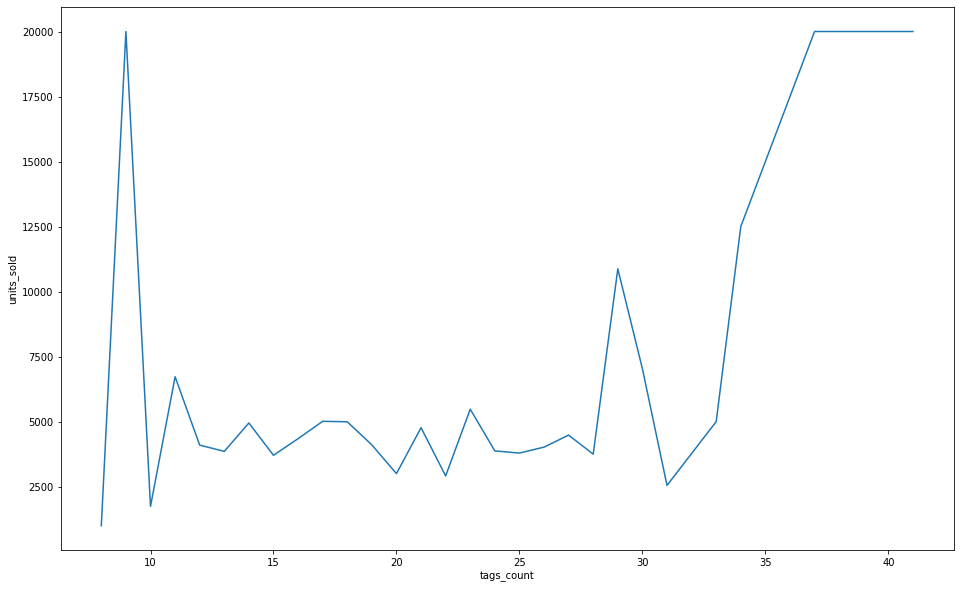

In [173]:
tags_fig = plt.gcf()
tags_fig.set_size_inches(16,10)
sns.lineplot(x='tags_count', y='units_sold', ci=None, data=data)

in general, above 30 tags the sales of clothes start growing.\
Below 10 there tags there is a spike which might be due to outliers.\
Let's check:

In [174]:
data[data['tags_count'] <= 10]

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,shipping_option_name,shipping_option_price,countries_shipped_to,has_urgency_banner,urgency_text,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tags_count
5,3.92,9,10,0,5.00,1,1.0,0.0,0.0,0.0,...,Livraison standard,1,40,NaN,NaN,CN,65,3.507692,0,10
12,1.91,6,1000,1,3.45,141,49.0,29.0,24.0,14.0,...,Envio Padrão,1,38,NaN,NaN,CN,557,4.123878,0,8
42,12.00,14,100,1,3.79,24,11.0,6.0,2.0,1.0,...,Standardversand,3,22,NaN,NaN,CN,196,4.020408,0,10
61,5.00,38,50,1,5.00,2,2.0,0.0,0.0,0.0,...,Livraison standard,1,33,NaN,NaN,CN,9,3.666667,0,10
87,5.78,8,20000,1,4.00,3975,2054.0,774.0,576.0,242.0,...,Standardowa wysyłka,1,29,NaN,NaN,CN,6555,4.184134,0,9
95,1.86,9,100,1,3.57,42,17.0,9.0,4.0,5.0,...,Livraison standard,1,40,1.0,Quantité limitée !,CN,7248,3.943019,0,10
428,12.00,14,50,0,3.88,8,2.0,4.0,1.0,1.0,...,Livraison standard,3,22,NaN,NaN,CN,52,3.884615,0,10
460,9.00,46,100,0,4.86,7,6.0,1.0,0.0,0.0,...,Livraison standard,3,74,NaN,NaN,CN,2228,4.228007,0,10
476,11.00,108,5000,0,2.95,299,72.0,47.0,59.0,36.0,...,Livraison standard,3,52,NaN,NaN,CN,2608,3.873083,0,10
527,3.83,4,100,0,3.57,67,27.0,15.0,6.0,7.0,...,Livraison standard,1,38,NaN,NaN,CN,5654,3.958790,0,10


the peak is due to 3 observations having 20000 sales each

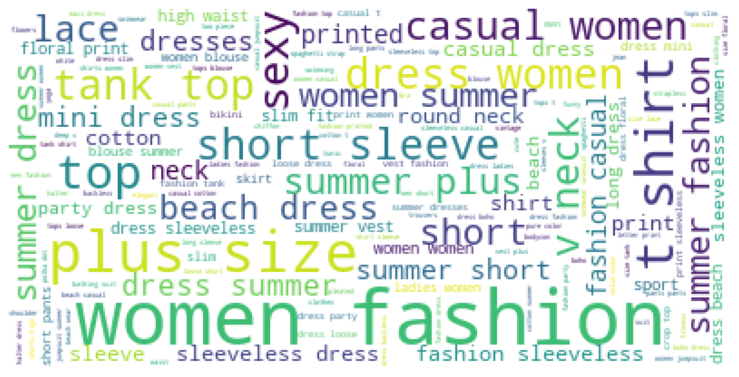

In [175]:
from wordcloud import WordCloud

# following is a single string with all the tags (repetitions included, because we have to form a wordcloud)
unique_str = " ".join(data['tags'].str.lower().str.split(',').sum())
wc_fig = plt.gcf()
wc_fig.set_size_inches( 13, 10)
wordcloud = WordCloud(background_color='white').generate(unique_str) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [176]:
data.drop('tags', axis=1, inplace=True)

In [177]:
data['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

## <span style='color:blue'>product_variation_size_id</span>

In [178]:
data['product_variation_size_id'].unique()

array(['M', 'XS', 'S', 'Size-XS', 'M.', 'XXS', 'L', 'XXL', nan, 'S.', 's',
       'choose a size', 'XS.', '32/L', 'Suit-S', 'XXXXXL', 'EU 35', '4',
       'Size S.', '1m by 3m', '3XL', 'Size S', 'XL', 'Women Size 36',
       'US 6.5 (EU 37)', 'XXXS', 'SIZE XS', '26(Waist 72cm 28inch)',
       'Size XXS', '29', '1pc', '100 cm', 'One Size', 'SIZE-4XL', '1',
       'S/M(child)', '2pcs', 'XXXL', 'S..', '30 cm', '5XL', '33',
       'Size M', '100 x 100cm(39.3 x 39.3inch)', '100pcs', '2XL', '4XL',
       'SizeL', 'SIZE XXS', 'XXXXL', 'Base & Top & Matte Top Coat',
       'size S', '35', '34', 'SIZE-XXS', 'S(bust 88cm)',
       'S (waist58-62cm)', 'S(Pink & Black)', '20pcs', 'US-S',
       'Size -XXS', 'X   L', 'White', '25', 'Size-S', 'Round',
       'Pack of 1', '1 pc.', 'S Diameter 30cm', '6XL',
       'AU plug Low quality', '5PAIRS', '25-S', 'Size/S', 'S Pink',
       'Size-5XL', 'daughter 24M', '2', 'Baby Float Boat', '10 ml', '60',
       'Size-L', 'US5.5-EU35', '10pcs', '17', 'Size-XXS

In [179]:
draft = data.copy()

In [180]:
draft['product_size'] = draft['product_variation_size_id'] 
draft.drop('product_variation_size_id', axis=1, inplace=True)

In [181]:
draft['product_size'].isna().sum()  # missing values

14

replacing missing values with mode

In [182]:
draft['product_size'].mode()

0    S
dtype: object

In [183]:
draft['product_size'].fillna('S', inplace=True)

In [184]:
draft['product_size'].isna().sum()  # missing values filled

0

In [185]:
draft['product_size'].value_counts().head(45)

S                644
XS               344
M                198
XXS               94
L                 49
XL                17
S.                16
XXL               15
XXXS               6
s                  5
Size S             5
XS.                5
4XL                5
2XL                4
Size-XS            4
M.                 4
SIZE XS            4
Size-S             3
33                 3
34                 3
10 ml              3
SizeL              3
2pcs               3
1                  2
Size4XL            2
Size -XXS          2
Size S.            2
1 pc.              2
XXXXL              2
35                 2
S Pink             2
29                 2
size S             2
One Size           2
5XL                2
XXXXXL             2
S(bust 88cm)       2
SIZE-XXS           2
EU 35              2
Suit-S             2
Size M             2
3XL                2
20PCS-10PAIRS      1
4                  1
L.                 1
Name: product_size, dtype: int64

In [186]:
draft['product_size'] = draft['product_size'].str.lower().str.replace('.','').str.replace('size ','').str.replace('size-','')\
.str.replace('size','').str.replace(' size','').str.replace('suit-','').str.replace('size -','').str.replace(' pink','')

In [187]:
draft['product_size'].value_counts().head(45)

s                         683
xs                        357
m                         204
xxs                        99
l                          54
xl                         17
xxl                        15
4xl                         8
xxxs                        6
2xl                         4
33                          3
10 ml                       3
2pcs                        3
5xl                         3
34                          3
eu 35                       2
-xxs                        2
xxxxl                       2
3xl                         2
1 pc                        2
1                           2
one                         2
s(bust 88cm)                2
35                          2
xxxxxl                      2
29                          2
5pairs                      1
1 pc - xl                   1
-s                          1
pack of 1                   1
au plug low quality         1
4                           1
36                          1
daughter 2

In [188]:
draft['product_size'] = draft['product_size'].str.replace('-','').str.replace(' diameter 30cm','').str.replace('pants-','')\
.str.replace('25-','').str.replace('us-','').str.replace('/','')

In [189]:
draft['product_size'].value_counts().head(45)

s                         686
xs                        357
m                         204
xxs                       101
l                          54
xl                         17
xxl                        15
4xl                         8
xxxs                        6
2xl                         4
33                          3
10 ml                       3
2pcs                        3
5xl                         3
34                          3
one                         2
29                          2
35                          2
s(bust 88cm)                2
1                           2
eu 35                       2
3xl                         2
1 pc                        2
xxxxl                       2
xxxxxl                      2
32l                         1
us55eu35                    1
5pairs                      1
women 36                    1
au plug low quality         1
pack of 1                   1
base coat                   1
26(waist 72cm 28inch)       1
b         

In [190]:
draft['product_size'] = draft['product_size'].str.replace('bust 88cm','').str.replace('pink & black','')\
.str.replace('xxl','xl').str.replace('xxxxl','xl').str.replace('xxxxxl','xl').str.replace('4xl','xl')\
.str.replace('5xl','xl').str.replace('3xl','xl').str.replace('xxxs','xxs').str.replace('2xl','xl')\
.str.replace('043','').str.replace('32l','l').str.replace('25s','s').str.replace('pants','')\
.str.replace('1 pc  xl','xl').str.replace('6xl','xl').str.replace('us','').str.replace('0xl','xl')\
.str.replace('x   l','xl')

In [191]:
draft['product_size'].value_counts().head(50)

s                              689
xs                             357
m                              204
xxs                            107
l                               55
xl                              54
2pcs                             3
34                               3
33                               3
10 ml                            3
s()                              3
35                               2
xxxl                             2
1                                2
one                              2
1 pc                             2
29                               2
eu 35                            2
2                                1
5pairs                           1
s (waist5862cm)                  1
pack of 1                        1
au plug low quality              1
3 layered anklet                 1
base coat                        1
women 36                         1
26(waist 72cm 28inch)            1
b                                1
5                   

need to handle all not readable size and put them in "other" category

In [192]:
def handle_size(c):
    if c in 'xxs,xs,s,m,l,xl'.split(','):
        return c
    else:
        return 'other'

In [193]:
draft['product_size'] = draft['product_size'].apply(handle_size)  # all sizes handled and simplified

In [194]:
draft['product_size'].value_counts()

s        689
xs       357
m        204
xxs      107
other     73
l         55
xl        54
Name: product_size, dtype: int64

In [195]:
draft['product_size'].value_counts().sum()  # correct

1539

In [196]:
data = draft.copy()  # back to original dataframe name

In [197]:
data['product_size'].unique()

array(['m', 'xs', 's', 'xxs', 'l', 'xl', 'other'], dtype=object)

In [198]:
size_sales = data.groupby('product_size').agg('sum')['units_sold'].to_frame() 
size_sales.reset_index(level=0, inplace=True)
size_sales = size_sales.sort_values('units_sold', ascending=False)
size_sales

,product_size,units_sold
3,s,3517908
1,m,1415337
5,xs,899189
0,l,305353
2,other,248312
4,xl,236610
6,xxs,183488


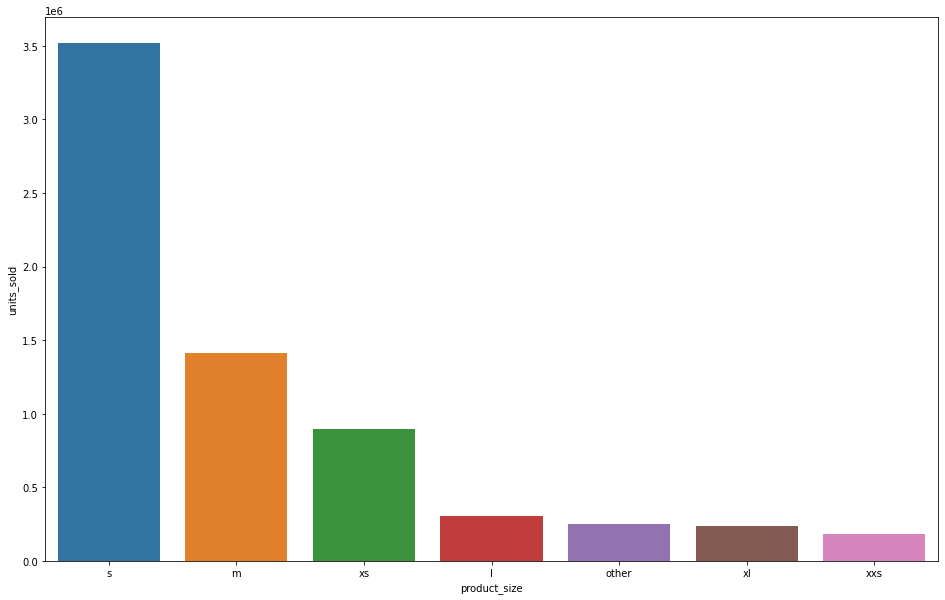

In [199]:
size_fig = plt.gcf()
size_fig.set_size_inches(16,10)
sns.barplot(x='product_size', y='units_sold', data=size_sales);

units sold are expressed in millions.
For example, 3.5 million size s items were sold.

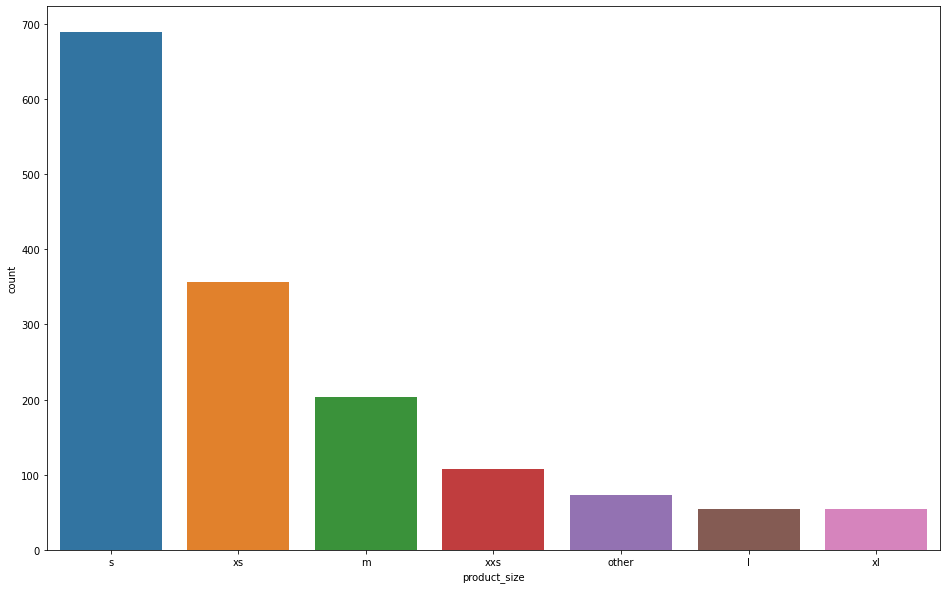

In [200]:
count_size_fig = plt.gcf()
count_size_fig.set_size_inches(16,10)
sns.countplot('product_size', order = data['product_size'].value_counts().index, data=data)
plt.show();

Items sold only partially reflect the distribution of sizes.\
For example, size m items were less present than xs items, but they collected more sales.

## <span style='color:blue'>urgency_text</span>

In [201]:
data['urgency_text'].value_counts()

Quantité limitée !                  467
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [202]:
data.drop('urgency_text', axis=1, inplace=True)  # removed

## <span style='color:blue'>shipping_option_name</span>

In [203]:
data.groupby('shipping_option_name').agg(['count', 'sum'])['units_sold']

,count,sum
shipping_option_name,,
Ekspresowa wysyłka,1,10000
Envio Padrão,9,22400
Envío normal,5,16100
Expediere Standard,6,2400
Livraison Express,3,1200
Livraison standard,1474,6591647
Spedizione standard,2,1100
Standard Shipping,21,88550
Standardowa wysyłka,3,30100


In [204]:
data.drop('shipping_option_name', axis=1, inplace=True)  # removed

## <span style='color:blue'>origin_country</span>

In [205]:
data.groupby('origin_country').agg(['count', 'sum'])['units_sold']


,count,sum
origin_country,,
AT,1,100
CN,1484,6632337
GB,1,1000
SG,2,20100
US,31,43560
VE,4,300


In [206]:
data['origin_country'].isna().sum()  # missing values

16

In [207]:
data.origin_country.mode()

0    CN
dtype: object

In [208]:
data['origin_country'].fillna('CN', inplace=True)

In [209]:
data['origin_country'].isna().sum()  # correct, no more missing values

0

# processing numerical feature

In [210]:
for f in numerical:
    print(f)

price
retail_price
units_sold
uses_ad_boosts
rating
rating_count
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
product_variation_inventory
shipping_option_price
countries_shipped_to
has_urgency_banner
merchant_rating_count
merchant_rating
merchant_has_profile_picture


## <span style='color:blue'>units_sold</span>
target variable

In [211]:
inspect_feature(data, 'units_sold')

units_sold has 15 unique categories
[   100  20000   5000     10  50000   1000  10000 100000     50      1
      7      2      3      8      6]


In [212]:
data.units_sold.median()

1000.0

creating new feature that I will use as label for classification models:

In [213]:
# if number of sales is above the median, the product is successful (1) otherwise not (0)
data['successful'] = data['units_sold'].apply(lambda x: 1 if x > 1000 else 0)

In [214]:
data['successful'].value_counts()

0    1021
1     518
Name: successful, dtype: int64

## <span style='color:blue'>rating related features</span>

In [215]:
rating_f = ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']

for f in rating_f:
    missing = data[f].isna().sum()
    print('{} feature has {} missing values'.format(f, missing))

rating_five_count feature has 43 missing values
rating_four_count feature has 43 missing values
rating_three_count feature has 43 missing values
rating_two_count feature has 43 missing values
rating_one_count feature has 43 missing values


let's check if missing values correspond to rating count zero, as we would expect

In [216]:
rating_feature = 'rating_five_count'  # change this to check others
data.loc[data[rating_feature].isna()][['rating_count', 'rating']]

,rating_count,rating
74,0,5.0
112,0,5.0
126,0,5.0
189,0,5.0
216,0,5.0
248,0,5.0
309,0,5.0
346,0,5.0
348,0,5.0
375,0,5.0


as expected, missing values are zeros, let's fill them.
Also, the rating for those is 5 which is not reasonable, let's replace with zero.

In [217]:
data.update(data[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']]\
           .fillna(0))

data.loc[data['rating_count'] == 0, 'rating'] = 0  # assigning rating zero to all products without ratings

In [218]:
data[['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count']].head()

,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
0,26.0,8.0,10.0,1.0,9.0
1,2269.0,1027.0,1118.0,644.0,1077.0
2,5.0,4.0,2.0,0.0,3.0
3,295.0,119.0,87.0,42.0,36.0
4,6.0,4.0,2.0,2.0,6.0


we saw that rating related features all have high correlations with units sold,\
although this makes sense with high rating, it does not with products rated one or two,\
because they should not be successful.

For this reason we need to normalise those features.\
In fact, the high correlation for low rating products might be explained by the fact that typically a product\
is rated once it has been purchased.\
Normalising them will make it possible to retrieve proportions which make more sense for the classification.

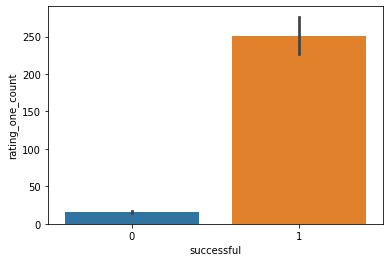

In [219]:
sns.barplot(x='successful', y='rating_one_count', data=data);

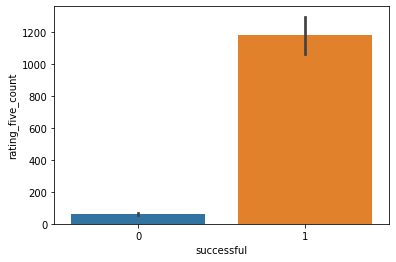

In [220]:
sns.barplot(x='successful', y='rating_five_count', data=data);

Above we see that the chance of being successful for product with one star rating is equal to those with five stars.

Let's normalise:

In [221]:
data['rating_one_count_prop'] = data['rating_one_count'] / data['rating_count']
data['rating_two_count_prop'] = data['rating_two_count'] / data['rating_count']
data['rating_three_count_prop'] = data['rating_three_count'] / data['rating_count']
data['rating_four_count_prop'] = data['rating_four_count'] / data['rating_count']
data['rating_five_count_prop'] = data['rating_five_count'] / data['rating_count']

In [222]:
# removing nan values due to dividing by zero (for those products with zero ratings)
data.update(data[['rating_one_count_prop','rating_two_count_prop','rating_three_count_prop','rating_four_count_prop'\
                 ,'rating_five_count_prop']].fillna(0))

Let's recheck the bar plots now:

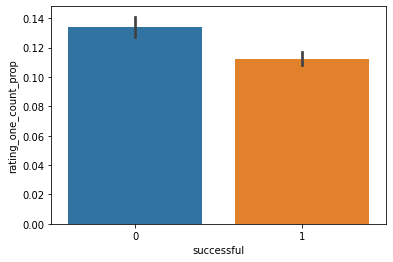

In [223]:
sns.barplot(x='successful', y='rating_one_count_prop', data=data);

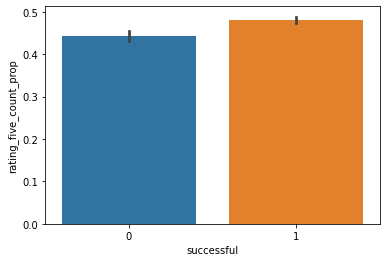

In [224]:
sns.barplot(x='successful', y='rating_five_count_prop', data=data);

Now we see the difference: products with rating five have more chances to be successful,\
while products with one star rating are more likely to be NOT successful.

In [225]:
# removing the rating count absolute values that we do not need anymore
data.drop(columns=['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'],\
         inplace=True)

## <span style='color:blue'>merchant_has_profile_picture</span>

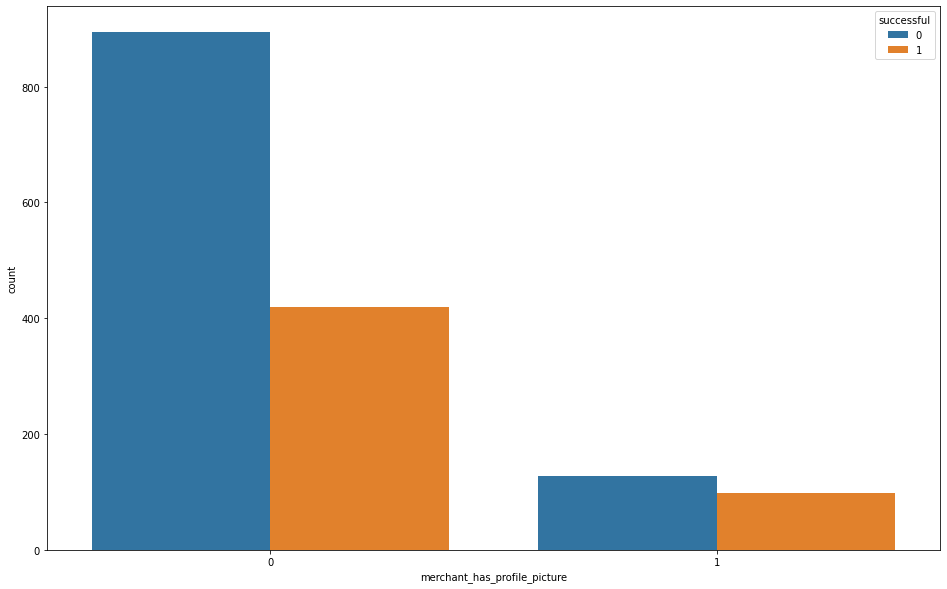

In [226]:
prof_fig = plt.gcf()
prof_fig.set_size_inches( 16, 10)
sns.countplot(data=data, x='merchant_has_profile_picture', hue='successful');

if the merchant has a profile picture, the chances of its product being successful increase

## <span style='color:blue'>merchant_rating</span>

In [227]:
# mer_fig = plt.gcf()
# mer_fig.set_size_inches(16,10)
# sns.violinplot(data=data, y='merchant_rating', x='successful');

we see that the distribution of the average rating in successful product is different than the one \
of less successful product: for successful product it does not go below 3.7, while for unsuccessful ones
is skewed towards lower values. 

## <span style='color:blue'>merchant_rating</span>

In [228]:
data['has_urgency_banner'].value_counts()

1.0    468
Name: has_urgency_banner, dtype: int64

In [229]:
data.update(data['has_urgency_banner'].fillna(0))  # fill missing values with 0 category (no urgency banner)

In [230]:
data['has_urgency_banner'].value_counts()

0.0    1071
1.0     468
Name: has_urgency_banner, dtype: int64

## <span style='color:blue'>badge features</span>

In [231]:
data['badge_local_product'].value_counts()

0    1510
1      29
Name: badge_local_product, dtype: int64

In [232]:
data['badge_fast_shipping'].value_counts()

0    1519
1      20
Name: badge_fast_shipping, dtype: int64

removing those as the positive class is very rare for both

In [233]:
data.drop(columns=['badge_local_product', 'badge_fast_shipping'], inplace=True)

# Data Engineering (preparation)

numerical features will be scaled,\
while categorical features will be encoded

In [234]:
numerical = []
categorical = []

for feature in data.columns:
    if data[feature].dtype == 'object':
        categorical.append(feature)
    else:
        numerical.append(feature)

In [235]:
categorical

['product_color', 'origin_country', 'product_size']

In [236]:
', '.join(numerical)

'price, retail_price, units_sold, uses_ad_boosts, rating, rating_count, badges_count, badge_product_quality, product_variation_inventory, shipping_option_price, countries_shipped_to, has_urgency_banner, merchant_rating_count, merchant_rating, merchant_has_profile_picture, tags_count, successful, rating_one_count_prop, rating_two_count_prop, rating_three_count_prop, rating_four_count_prop, rating_five_count_prop'

creating dummy variables for the three categorical features:

In [237]:
draft = pd.get_dummies(data, columns=['product_color'], prefix='color_', drop_first=True)

In [238]:
draft = pd.get_dummies(draft, columns=['origin_country'], prefix='origin_', drop_first=True)

In [239]:
draft = pd.get_dummies(draft, columns=['product_size'], prefix='size_', drop_first=True)

In [240]:
len(draft.columns)

47

In [241]:
draft.dtypes

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_product_quality             int64
product_variation_inventory       int64
shipping_option_price             int64
countries_shipped_to              int64
has_urgency_banner              float64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
tags_count                        int64
successful                        int64
rating_one_count_prop           float64
rating_two_count_prop           float64
rating_three_count_prop         float64
rating_four_count_prop          float64
rating_five_count_prop          float64
color__blue                       uint8
color__brown                      uint8
color__floral                     uint8


In [242]:
data = draft.copy()

In [243]:
data.isna().any().to_frame()  # no missing values

,0
price,False
retail_price,False
units_sold,False
uses_ad_boosts,False
rating,False
rating_count,False
badges_count,False
badge_product_quality,False
product_variation_inventory,False
shipping_option_price,False


# BINARY CLASSIFICATION
predicting if product is successful or not

In [244]:
data1 = data.copy()

## Train, Test sets

I am going to create a training and testing set for both predictors and the label.\
Here I am focusing on the classification task of predicting whether a product is successful or not.

The following code takes as parameters the predictors dataset and the label, returning for each of them\
a training and a testing set.

In [245]:
data1['successful'].to_frame().value_counts()

successful
0             1021
1              518
dtype: int64

In [246]:
from sklearn.model_selection import train_test_split

predictors = data1.drop(['successful', 'units_sold'], axis=1)
label = data1['successful']

X_train, X_test, y_train, y_test  = train_test_split(predictors, label, test_size=0.2, random_state=10, stratify=label)

In [247]:
label.to_frame()

,successful
0,0
1,1
2,0
3,1
4,0
...,...
1568,1
1569,0
1570,0
1571,0


stratifying according to the label means that the split will capture the same proportions of\
positive and negative class in both training and testing data.

Let's confirm that:

In [248]:
# proportion of positive class in training
tot_pos_train = len(y_train[y_train == 1])
prop_pos_train = tot_pos_train / len(y_train) * 100

print('{} % of positives in training data'.format(prop_pos_train))
print('{} % of negatives in training data'.format(100 - prop_pos_train))

print()

# proportion of positive class in testing
tot_pos_test = len(y_test[y_test == 1])
prop_pos_test = tot_pos_test / len(y_test) * 100

print('{} % of positives in testing data'.format(prop_pos_test))
print('{} % of negatives in testing data'.format(100 - prop_pos_test))

33.63119415109667 % of positives in training data
66.36880584890332 % of negatives in training data

33.76623376623377 % of positives in testing data
66.23376623376623 % of negatives in testing data


In [249]:
# # alternative and quicker method:
# # proportion of class 1 in training data
# y_train_c.value_counts(1)
# # proportion of class 1 in testing data
# y_test_c.value_counts(1)

## scaling features
since we already handled the categorical variables through dummy encoding, we can scale the entire dataset

In [250]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fitting and transforming training set
X_train_scaled

array([[-0.64844352, -0.60128748, -0.9031247 , ..., -0.19702428,
         1.83446129, -0.28753035],
       [ 0.69856659, -0.29926708,  1.10726681, ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-0.61944722, -0.56772966,  1.10726681, ..., -0.19702428,
        -0.54511916, -0.28753035],
       ...,
       [-0.35584446, -0.56772966,  1.10726681, ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-0.88304998, -0.60128748, -0.9031247 , ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-0.91995437, -0.50061402,  1.10726681, ..., -0.19702428,
         1.83446129, -0.28753035]])

## select and train ML models

In [251]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [252]:
models = [SGDClassifier, RandomForestClassifier, GaussianNB, DecisionTreeClassifier, LogisticRegression, SVC]
names = ['SGD Classifier', 'Random Forest Classifier', 'Gaussian NB Classifier', 'Decision Tree Classifier',\
        'Logistic Regressor', 'Support Vector Classifier']

In [253]:
from sklearn.metrics import accuracy_score

for i in range(len(models)):
    model = models[i]()  # initializing model
    name = names[i] 
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    print(f'accuracy of {name}: ',accuracy_score(y_pred, y_train))

accuracy of SGD Classifier:  0.9431356620633631
accuracy of Random Forest Classifier:  1.0
accuracy of Gaussian NB Classifier:  0.5588952071486596
accuracy of Decision Tree Classifier:  1.0
accuracy of Logistic Regressor:  0.9553208773354996
accuracy of Support Vector Classifier:  0.9187652315190902


## evaluating through cross validation

In [254]:
from sklearn.model_selection import cross_val_score

for i in range(len(models)):
    model = models[i]()
    name = names[i] 
    acc = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f'cross validation accuracy of {name}: ',acc.mean())

cross validation accuracy of SGD Classifier:  0.9285112405779928
cross validation accuracy of Random Forest Classifier:  0.9439485204568644
cross validation accuracy of Gaussian NB Classifier:  0.5783845166386887
cross validation accuracy of Decision Tree Classifier:  0.9268885158487213
cross validation accuracy of Logistic Regressor:  0.9439485204568644
cross validation accuracy of Support Vector Classifier:  0.8643593035120635


# focusing on Random Forest Classifier and Logistic Regressor

## Random Forest

In [255]:
from sklearn.model_selection import cross_val_predict

rf = RandomForestClassifier(random_state=1)
y_pred_rf = cross_val_predict(rf, X_train_scaled, y_train, cv=5)

In [256]:
accuracy_score(y_train, y_pred_rf)

0.9398862713241267

In [257]:
y_pred_rf[:20]

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [258]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_train, y_pred_rf)
cm_rf

array([[789,  28],
       [ 46, 368]], dtype=int64)

In [259]:
from sklearn.metrics import precision_score, recall_score, f1_score

ps_rf = precision_score(y_train, y_pred_rf)  # accuracy of positive predictions
rs_rf = recall_score(y_train, y_pred_rf)  # ratio of positives detected
print('precision score is {} %'.format(ps_rf*100))
print('recall score is {} %'.format(rs_rf*100))
f1s_rf = f1_score(y_train, y_pred_rf)
print('f1 score is {} %'.format(f1s_rf*100))

precision score is 92.92929292929293 %
recall score is 88.88888888888889 %
f1 score is 90.86419753086419 %


### looking into decision scores

In [260]:
# first let's return some predictions
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_scaled, y_train)
some_pred = rf.predict(X_train_scaled[:10])
some_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [261]:
some_labels = y_train[:10]
some_labels

367     1
654     1
374     0
1162    1
1463    1
576     0
457     0
724     1
400     1
295     0
Name: successful, dtype: int64

In [262]:
# returning the decision score of the first 10 observations
some_scores = rf.predict_proba(X_train_scaled[:10])
some_scores

array([[0.29, 0.71],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [0.02, 0.98],
       [1.  , 0.  ],
       [0.89, 0.11],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.93, 0.07]])

## precision, recall trade-off

In [263]:
y_probas_rf = cross_val_predict(rf, X_train_scaled, y_train, cv=5, method='predict_proba')
y_probas_rf = y_probas_rf[:,1]  # taking second column which correspond to probability of being class 1

In [264]:
y_probas_rf

array([0.27, 0.94, 0.02, ..., 0.1 , 0.15, 0.07])

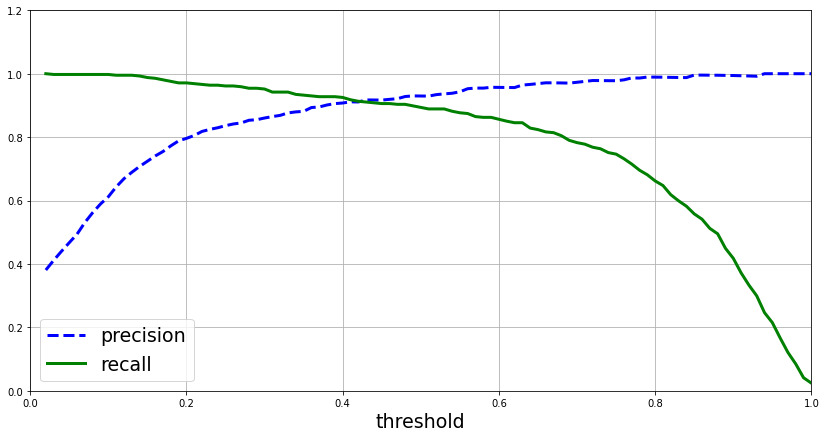

In [265]:
from sklearn.metrics import precision_recall_curve

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_probas_rf)

def plot_precision_and_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision', linewidth=3)
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall', linewidth=3)
    plt.xlabel('threshold', fontsize=19)
    plt.legend(loc='lower left', fontsize=19)
    plt.axis([0,1,0,1.2])
    plt.grid()
    
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precisions_rf, recalls_rf, thresholds_rf)
plt.show()

## the ROC curve

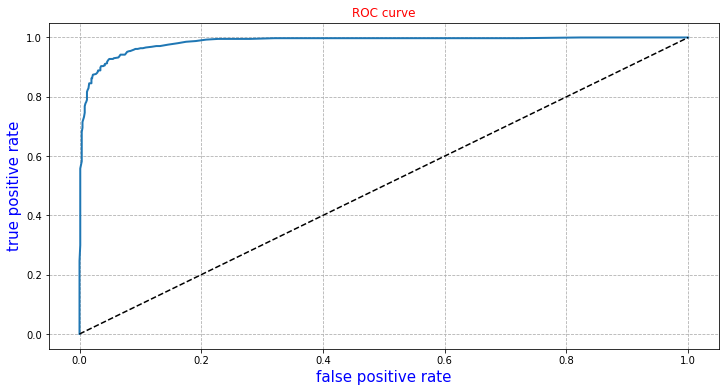

In [266]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_probas_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.grid(linestyle='--')
    plt.title("ROC curve", color='red')
    plt.xlabel("false positive rate", color='blue', size=15)
    plt.ylabel("true positive rate", color='blue', size=15)
    
plt.figure(figsize=(12, 6))                                   
plot_roc_curve(fpr_rf, tpr_rf)
plt.show()

In [267]:
from sklearn.metrics import roc_auc_score

roc_auc_rf = roc_auc_score(y_train, y_probas_rf)
roc_auc_rf

0.984824295318681

## Logistic Regressor

In [268]:
lr = LogisticRegression(random_state=11)
y_pred_lr = cross_val_predict(lr, X_train_scaled, y_train, cv=5)

In [269]:
accuracy_score(y_train, y_pred_lr)

0.9439480097481722

In [270]:
cm_lr = confusion_matrix(y_train, y_pred_lr)
cm_lr

array([[801,  16],
       [ 53, 361]], dtype=int64)

In [271]:
ps_lr = precision_score(y_train, y_pred_lr)  # accuracy of positive predictions
rs_lr = recall_score(y_train, y_pred_lr)  # ratio of positives detected
print('precision score is {} %'.format(ps_lr*100))
print('recall score is {} %'.format(rs_lr*100))
f1s_lr = f1_score(y_train, y_pred_lr)
print('f1 score is {} %'.format(f1s_lr*100))

precision score is 95.75596816976127 %
recall score is 87.19806763285024 %
f1 score is 91.27686472819217 %


In [272]:
y_scores_lr = cross_val_predict(lr, X_train_scaled, y_train, cv=5, method='decision_function')
y_scores_lr[:10]

array([-2.60592305, 34.36053491, -2.18049077,  1.25988623,  4.24515311,
       -3.42170598, -1.21264816,  9.363912  ,  5.62568895, -2.15028473])

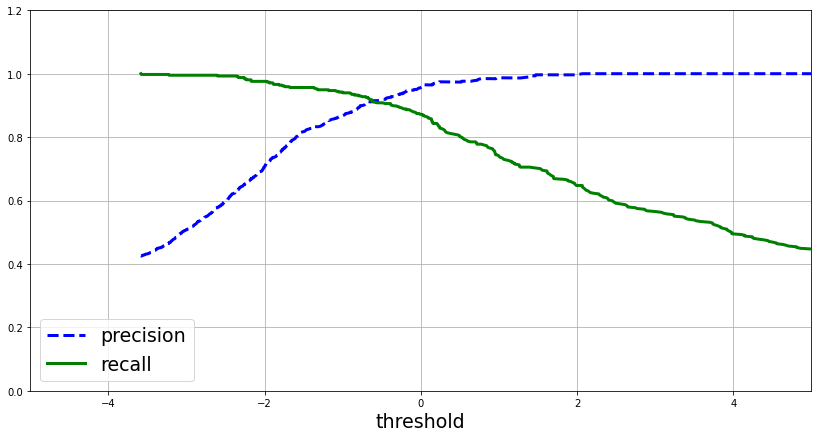

In [273]:
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_train, y_scores_lr)

def plot_precision_and_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision', linewidth=3)
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall', linewidth=3)
    plt.xlabel('threshold', fontsize=19)
    plt.legend(loc='lower left', fontsize=19)
    plt.axis([-5,5,0,1.2])
    plt.grid()
    
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precisions_lr, recalls_lr, thresholds_lr)
plt.show()

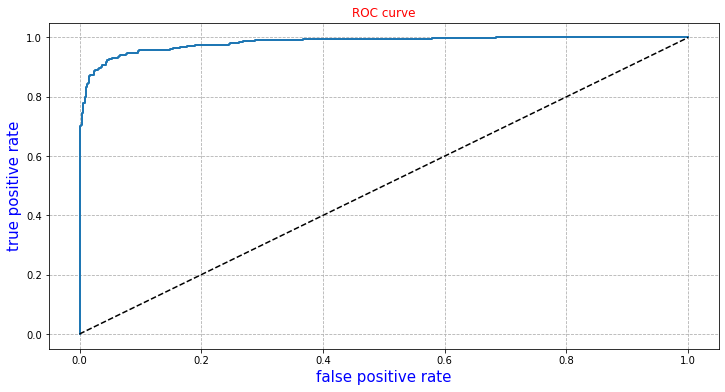

In [274]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.grid(linestyle='--')
    plt.title("ROC curve", color='red')
    plt.xlabel("false positive rate", color='blue', size=15)
    plt.ylabel("true positive rate", color='blue', size=15)
    
plt.figure(figsize=(12, 6))                                   
plot_roc_curve(fpr_lr, tpr_lr)
plt.show()

In [275]:
roc_auc_lr = roc_auc_score(y_train, y_scores_lr)
roc_auc_lr

0.9825625742820144

## Plotting ROC curve of RF vs LR

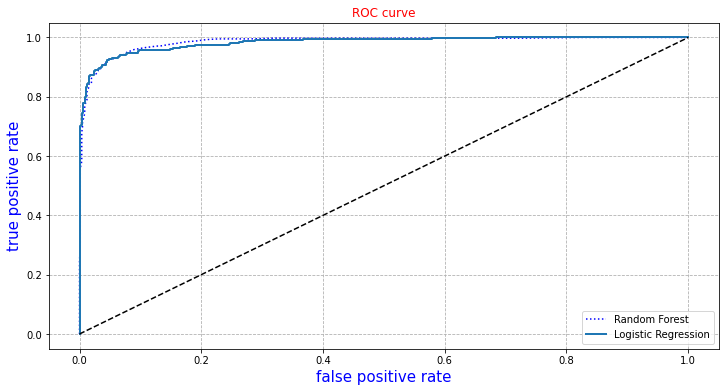

In [155]:
plt.figure(figsize=(12, 6))  
plt.plot(fpr_rf, tpr_rf, "b:", label='Random Forest')
#plot_roc_curve(fpr_rf, tpr_rf, label="Random Forest")
plot_roc_curve(fpr_lr, tpr_lr, label="Logistic Regression")
plt.legend()
plt.show()

we see that the Random Forest has a slightly higher ROC AUC score than Logistic Regression

## hyperparameters tuning of Random Forest

In [292]:
from sklearn.model_selection import GridSearchCV


n_estimators = [80, 100, 120]
max_depth = [15, 18]
min_samples_split = [2]
min_samples_leaf = [1] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rf = RandomForestClassifier()

gridF = GridSearchCV(estimator = rf, param_grid = hyperF, cv = 3, verbose = 2, 
                      n_jobs = -1)

In [293]:
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [294]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [295]:
best_model = bestF.best_estimator_
best_model

RandomForestClassifier(max_depth=15)

In [280]:
# forestOpt = RandomForestClassifier(random_state = 1,
#                                    max_depth = 15,
#                                    n_estimators = 500,
#                                    min_samples_split = 2,
#                                    min_samples_leaf = 1)

## scaling testing predictors before applying fine-tuned model

In [296]:
X_test_scaled = scaler.transform(X_test)  # transforming test set (no fitting)
X_test_scaled

array([[-0.09224169,  1.74776009, -0.9031247 , ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-0.09224169,  2.31824308, -0.9031247 , ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-0.90941026, -0.60128748, -0.9031247 , ..., -0.19702428,
         1.83446129, -0.28753035],
       ...,
       [ 0.17136107,  1.94910703, -0.9031247 , ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-1.46034003, -0.66840313,  1.10726681, ..., -0.19702428,
        -0.54511916, -0.28753035],
       [-0.88304998,  0.17054244,  1.10726681, ..., -0.19702428,
        -0.54511916, -0.28753035]])

# predicting on test data

In [297]:
y_pred = best_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [298]:
accuracy_score(y_test, y_pred)

0.9383116883116883